# What is the shape of "movies.csv"?


In [22]:
import pandas as pd
file_path="C://Users//varsh//OneDrive//Documents//movies.csv"
movies_data=pd.read_csv(file_path)
print("The shape of movies.csv is ",movies_data.shape)

The shape of movies.csv is  (9742, 3)


# What is the shape of "ratings.csv"?

In [4]:
file_path2="C://Users//varsh//OneDrive//Documents//ratings.csv"
ratings_data=pd.read_csv(file_path2)
print("The shape of ratings.csv is ",ratings_data.shape)

The shape of ratings.csv is  (100836, 4)


# How many unique "userId" are available in "ratings.csv"?

In [13]:
unique_val=len(pd.unique(ratings_data['userId']))
print(unique_val)

610


# Which movie has recieved maximum number of user ratings?

In [36]:
merged_df = pd.merge(ratings_data, movies_data, on="movieId")
ratings_count = merged_df.groupby("title").size()
max_ratings_movie = ratings_count.idxmax()
print(f"The movie with the maximum number of user ratings is: {max_ratings_movie}")

The movie with the maximum number of user ratings is: Forrest Gump (1994)


# Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [58]:
tags_data=pd.read_csv("C://Users//varsh//OneDrive//Documents//tags.csv")
matrix_movie_id = movies_data[movies_data["title"] == "Matrix, The (1999)"]["movieId"].values[0]
matrix_tags = tags_data[tags_data["movieId"] == matrix_movie_id]
print("Tags for Matrix, The (1999):")
print(matrix_tags["tag"].tolist())

Tags for Matrix, The (1999):
['martial arts', 'sci-fi', 'alternate universe', 'philosophy', 'post apocalyptic']


# What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?


In [42]:
terminator_id = movies_data[(movies_data["title"] == "Terminator 2: Judgment Day (1991)")]["movieId"].values[0]
terminator_ratings = ratings_data[ratings_data["movieId"] == terminator_id]
average_rating = terminator_ratings["rating"].mean()
print("The average user rating for 'Terminator 2: Judgment Day (1991) is: ",average_rating )

The average user rating for 'Terminator 2: Judgment Day (1991) is:  3.970982142857143


# How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

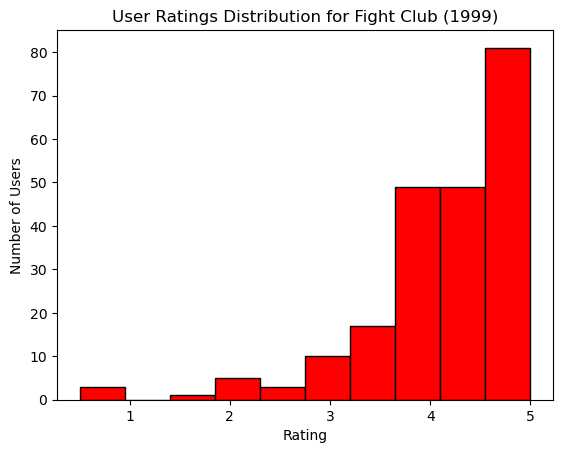

In [47]:
import matplotlib.pyplot as plt
fight_club_movie_id = movies_data[(movies_data["title"] == "Fight Club (1999)")]["movieId"].values[0]
fight_club_ratings = ratings_data[ratings_data["movieId"] == fight_club_movie_id]
plt.hist(fight_club_ratings["rating"], bins=10, edgecolor="black",color="red")
plt.title("User Ratings Distribution for Fight Club (1999)")
plt.xlabel("Rating")
plt.ylabel("Number of Users")
plt.show()

# Which movie is the most popular based on average user ratings?

In [48]:
merged_df1 = pd.merge(movies_data, ratings_data, on='movieId')
movies_to_compare = ['Godfather, The (1972)', 'Shawshank Redemption, The (1994)','Jumanji (1995)', 'Wolf of Wall Street, The (2013)']
filtered_df = merged_df1[merged_df1['title'].isin(movies_to_compare)]
average_ratings = filtered_df.groupby('title')['rating'].mean()
sorted_ratings = average_ratings.sort_values(ascending=False)
print("Most popular movie based on average user ratings:")
print(sorted_ratings.index[0])

Most popular movie based on average user ratings:
Shawshank Redemption, The (1994)


# Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [51]:
merged_df = pd.merge(ratings_data, movies_data, on="movieId")
ratings_count = merged_df.groupby("title")["rating"].count()
top_5_movies = ratings_count.nlargest(5).index
print("Top 5 popular movies based on number of user ratings:")
print(top_5_movies)

Top 5 popular movies based on number of user ratings:
Index(['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)',
       'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)',
       'Matrix, The (1999)'],
      dtype='object', name='title')


# Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [54]:
merged_df = pd.merge(movies_data, ratings_data, on='movieId')
scifi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi')] 
rating_counts = scifi_movies.groupby('title')['rating'].count()
sorted_rating_counts = rating_counts.sort_values(ascending=False)
third_most_popular_scifi = sorted_rating_counts.index[2]
print("Third most popular Sci-Fi movie based on user ratings:", third_most_popular_scifi)

Third most popular Sci-Fi movie based on user ratings: Jurassic Park (1993)


# Mention the movieId of the movie which has the highest IMDB rating.

In [53]:
merged_df = pd.merge(movies_data, ratings_data, on='movieId')
movie_with_highest_rating = merged_df.loc[merged_df['rating'] == merged_df['rating'].max()]
movieId_with_highest_rating = movie_with_highest_rating['movieId'].iloc[0]
print("MovieId of the movie with the highest IMDB rating:")
print(movieId_with_highest_rating)

MovieId of the movie with the highest IMDB rating:
1


# Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [55]:
merged_df = pd.merge(movies_data, ratings_data, on='movieId')
scifi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi')]
scifi_movie_with_highest_rating = scifi_movies.loc[scifi_movies['rating'] == scifi_movies['rating'].max()]
scifi_movieId_with_highest_rating = scifi_movie_with_highest_rating['movieId'].iloc[0]
print("MovieId of the Sci-Fi movie with the highest IMDB rating:",scifi_movieId_with_highest_rating)

MovieId of the Sci-Fi movie with the highest IMDB rating: 24
